# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [3]:
# Load the dataset
empl_data = pd.read_csv("employee_data.csv")

In [4]:
# Check the first few entries
empl_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [5]:
# Inspect the shape of the dataset
empl_data.shape

(74610, 24)

In [6]:
# Inspect the different columns in the dataset
empl_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [7]:
# Check the summary of the dataset
empl_data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


### **1.3 Check the data type of columns**

In [8]:
# Check the info to see the types of the feature variables and the null values present
empl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [9]:
# Check the number of missing values in each column
empl_data.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [10]:
# Check the percentage of missing values in each column
empl_data_null_in_pct=100.00*empl_data.isnull().sum()/len(empl_data)
empl_data_null_in_pct

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [11]:
# Handle the missing value rows in the column
emp_data = empl_data.dropna()

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [12]:
# Check the percentage of remaining data after missing values are removed
emp_data_null_in_pct=100.00*emp_data.isnull().sum()/len(emp_data)
emp_data_null_in_pct

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [13]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def analyze_categorical_columns(df):
    print("--- Categorical Column Analysis ---")
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    if len(categorical_columns) == 0:
        print("No categorical columns found in the DataFrame.")
        return

    for col in categorical_columns:
        print(f"\nColumn: '{col}'")
        unique_values = df[col].unique()
        print(f"  Unique values ({len(unique_values)}):")
        for value in unique_values:
            print(f"    - {value}")

        # Check for redundant values (case-insensitive)
        lower_case_unique_values = set(str(v).lower() for v in unique_values)
        if len(lower_case_unique_values) < len(unique_values):
            print("  Potential redundant values (case-insensitive) found!")
            print("  Original unique values:")
            print(unique_values)
            print("  Lower-cased unique values (for comparison):")
            print(list(lower_case_unique_values))
            
            # Identify specific redundant values
            redundant_groups = {}
            for val in unique_values:
                lower_val = str(val).lower()
                if lower_val not in redundant_groups:
                    redundant_groups[lower_val] = []
                redundant_groups[lower_val].append(val)
            
            for lower_val, original_vals in redundant_groups.items():
                if len(original_vals) > 1:
                    print(f"    - '{lower_val}' corresponds to: {original_vals}")
        else:
            print("  No apparent redundant values (case-insensitive).")

In [14]:
# Check the data
analyze_categorical_columns(emp_data)

--- Categorical Column Analysis ---

Column: 'Gender'
  Unique values (2):
    - Male
    - Female
  No apparent redundant values (case-insensitive).

Column: 'Job Role'
  Unique values (5):
    - Education
    - Media
    - Healthcare
    - Technology
    - Finance
  No apparent redundant values (case-insensitive).

Column: 'Work-Life Balance'
  Unique values (4):
    - Excellent
    - Poor
    - Good
    - Fair
  No apparent redundant values (case-insensitive).

Column: 'Job Satisfaction'
  Unique values (4):
    - Medium
    - High
    - Very High
    - Low
  No apparent redundant values (case-insensitive).

Column: 'Performance Rating'
  Unique values (4):
    - Average
    - Low
    - High
    - Below Average
  No apparent redundant values (case-insensitive).

Column: 'Overtime'
  Unique values (2):
    - No
    - Yes
  No apparent redundant values (case-insensitive).

Column: 'Education Level'
  Unique values (5):
    - Associate Degree
    - Masterâ€™s Degree
    - Bachelorâ€™s 

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [15]:
# Drop redundant columns which are not required for modelling
emp_data.drop(["Employee ID","Company Tenure (In Months)"],axis=1, inplace=True)

In [16]:
# Check first few rows of data
emp_data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,Married,0,Mid,Medium,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,Divorced,3,Mid,Medium,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,Married,3,Mid,Medium,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,Single,2,Mid,Small,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,Divorced,0,Senior,Medium,No,No,No,Fair,Medium,Stayed


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [17]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [18]:
# Put all the feature variables in X
X = emp_data.drop(['Attrition'], axis=1)
# Put the target variable in y
y = emp_data['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [19]:
# Split the data into 70% train data and 30% validation data
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [20]:
# Select numerical columns
X_train_numeric = X_train.select_dtypes(include=np.number)
X_train_numeric.columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents'],
      dtype='object')

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

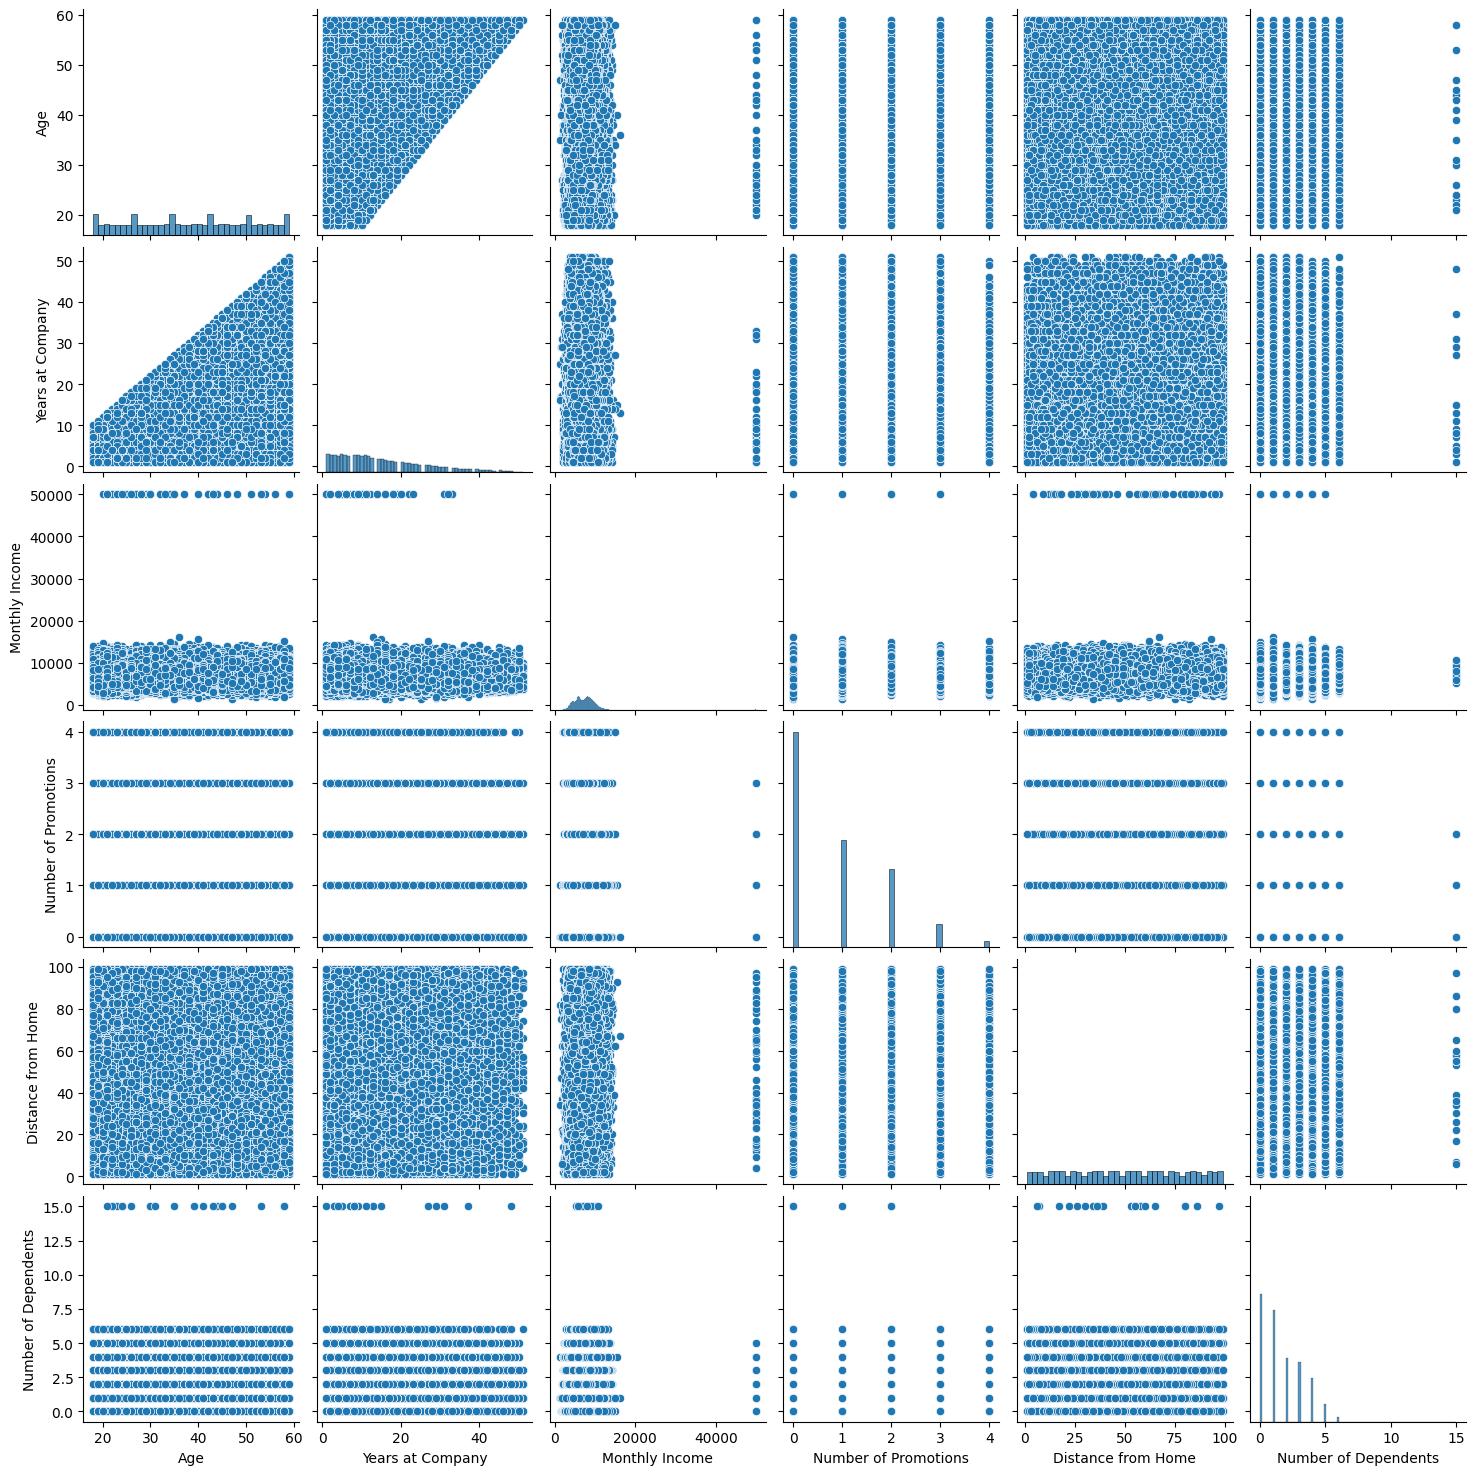

In [21]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(X_train)
plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

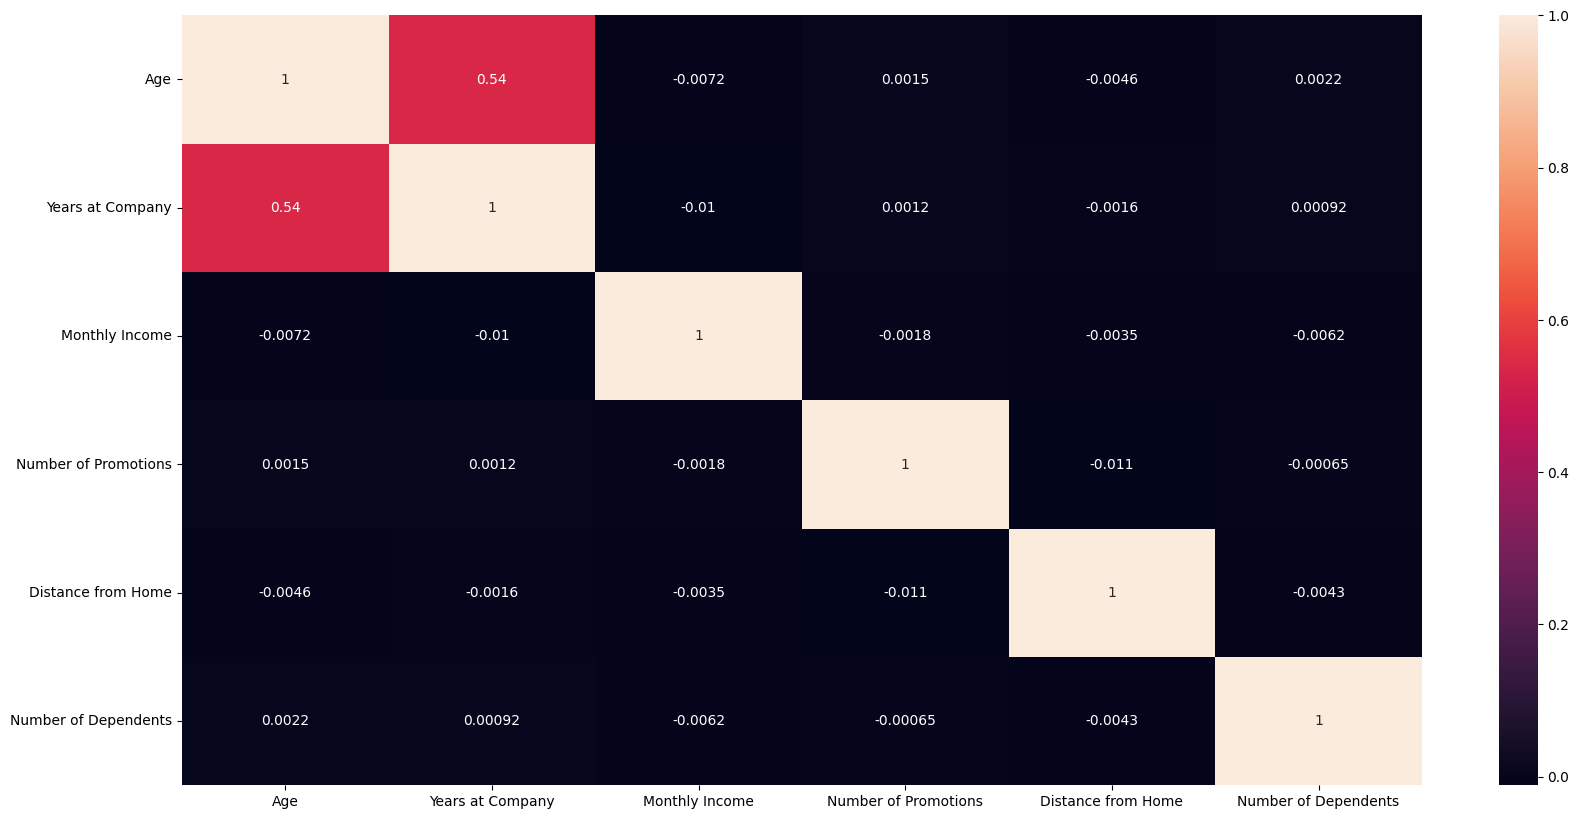

In [22]:
# Create correlation matrix for numerical columns
corr_matrix = X_train_numeric.corr()

# Plot Heatmap of the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix,annot = True)
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

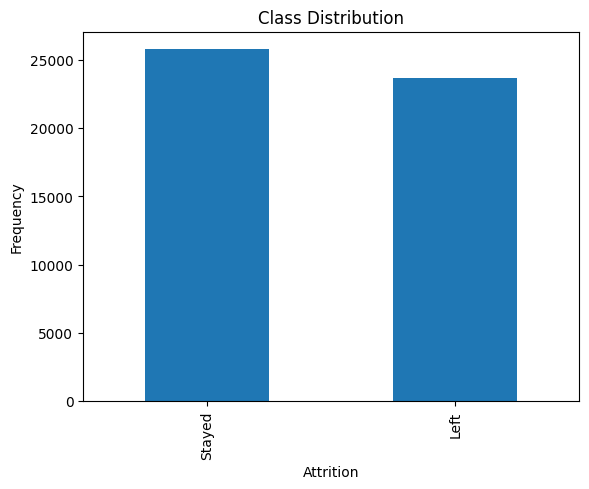

In [23]:
# Plot a bar chart to check class balance
y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.ylabel('Frequency')
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

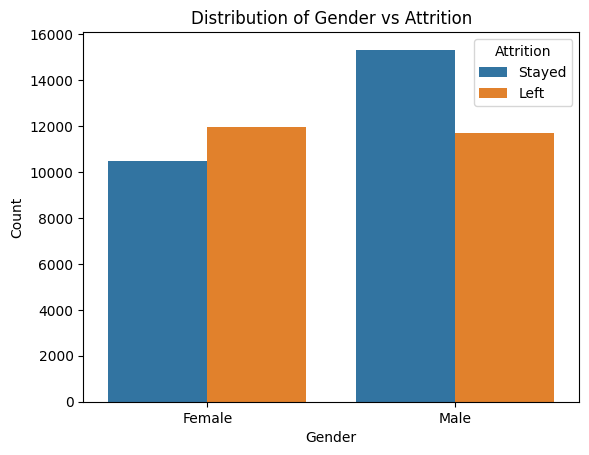

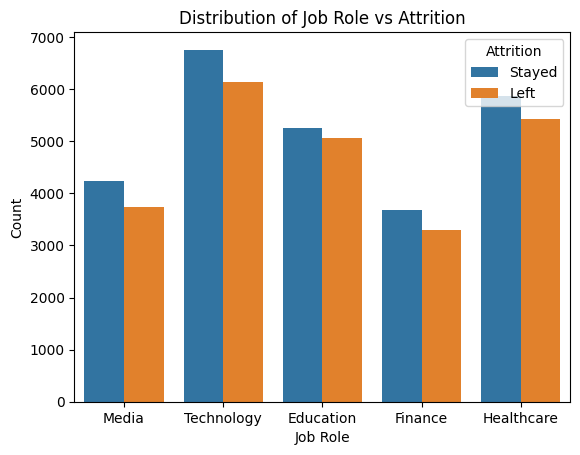

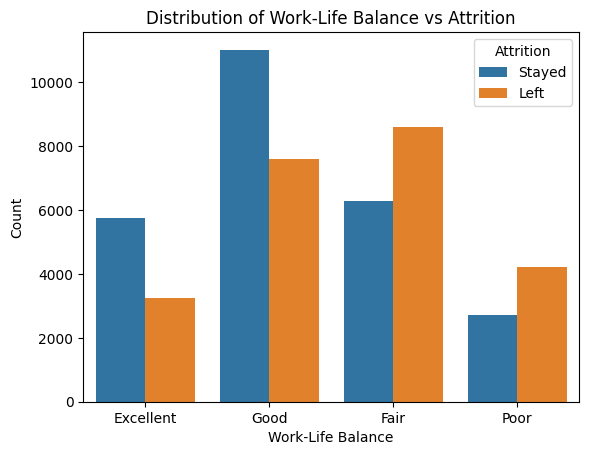

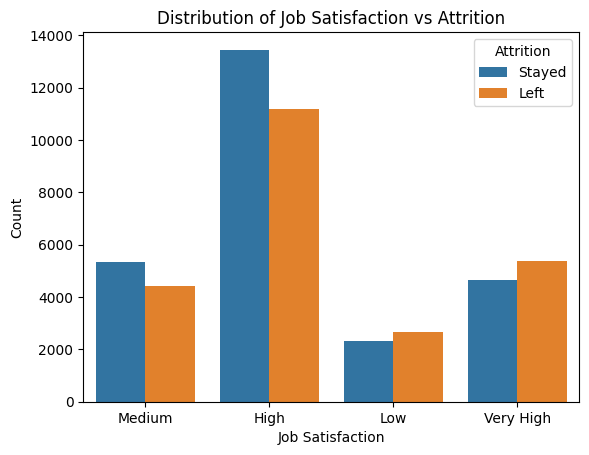

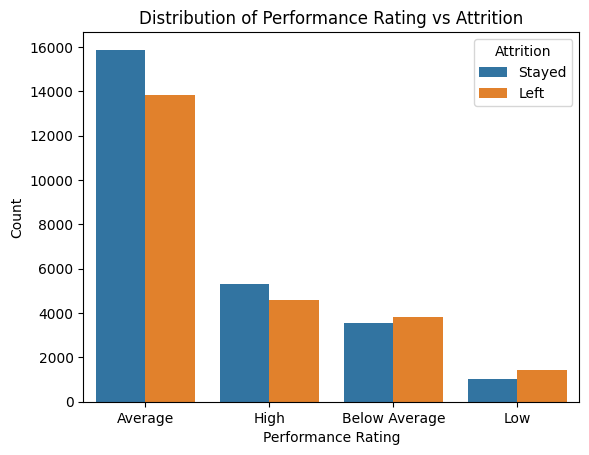

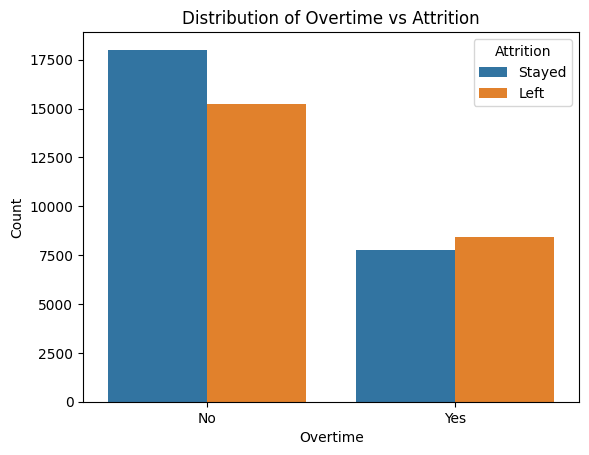

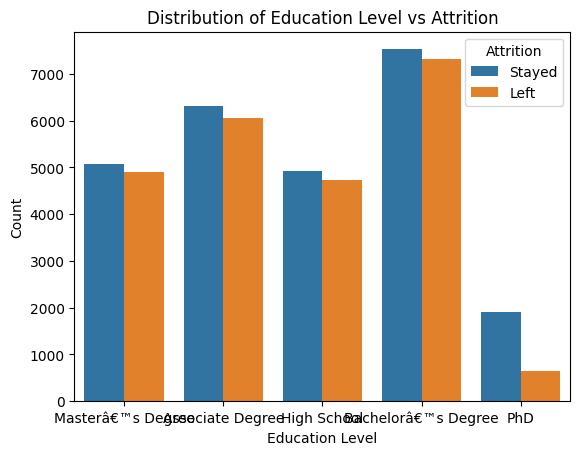

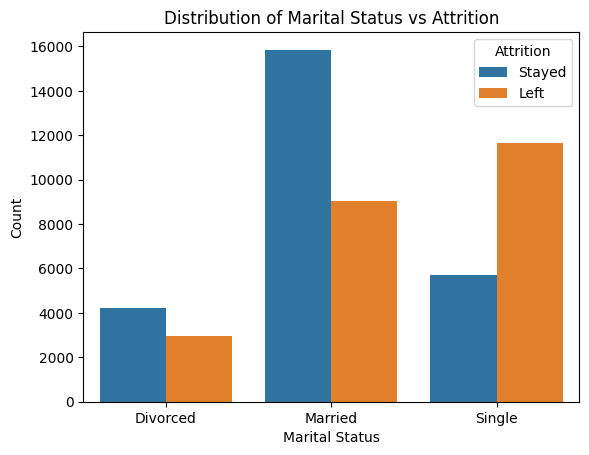

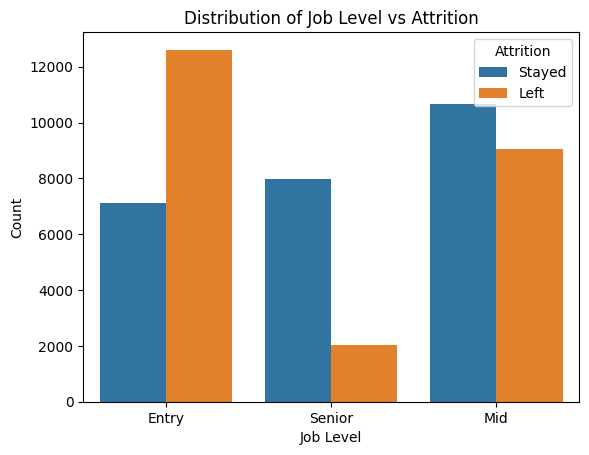

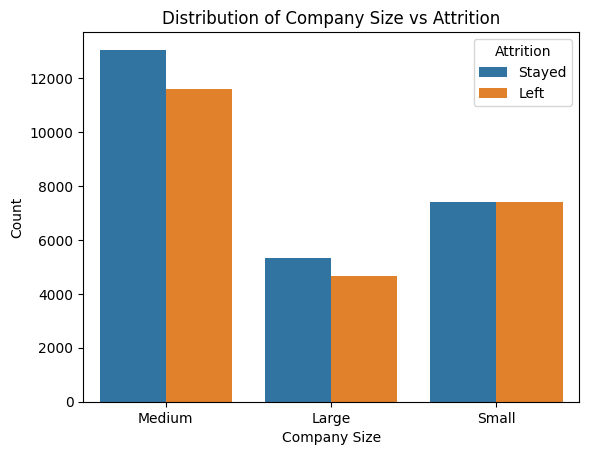

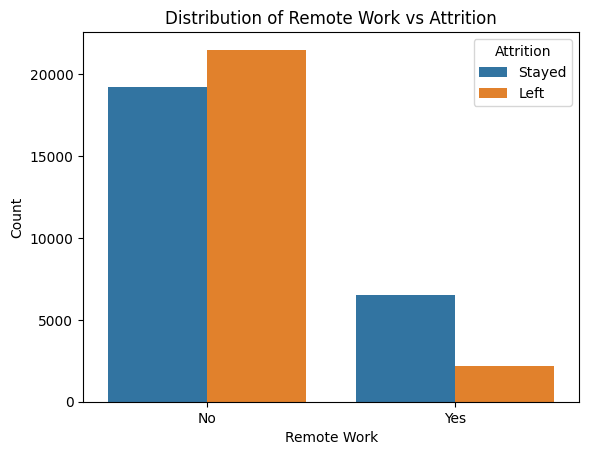

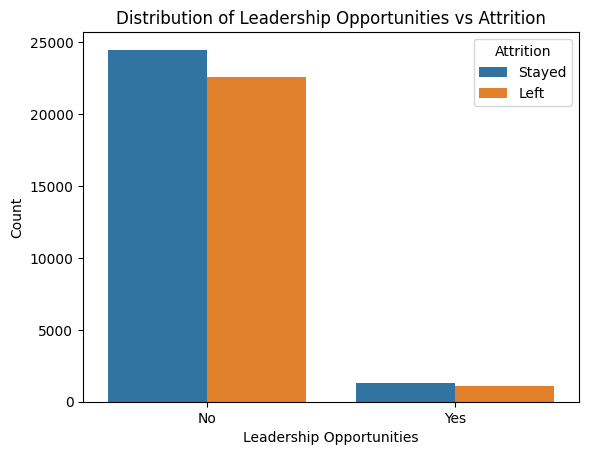

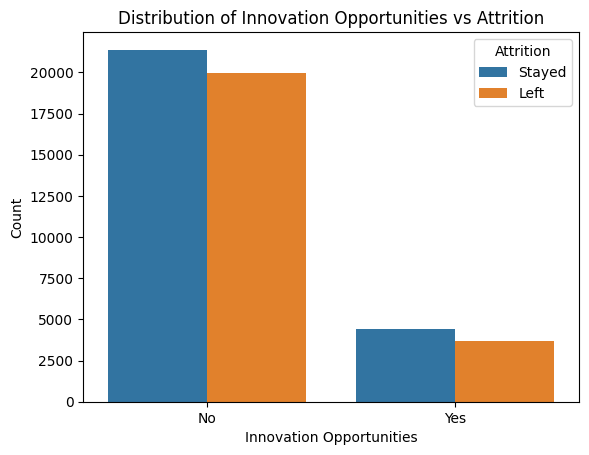

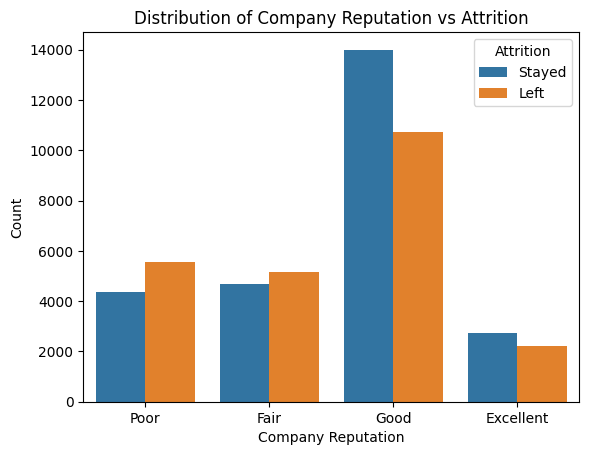

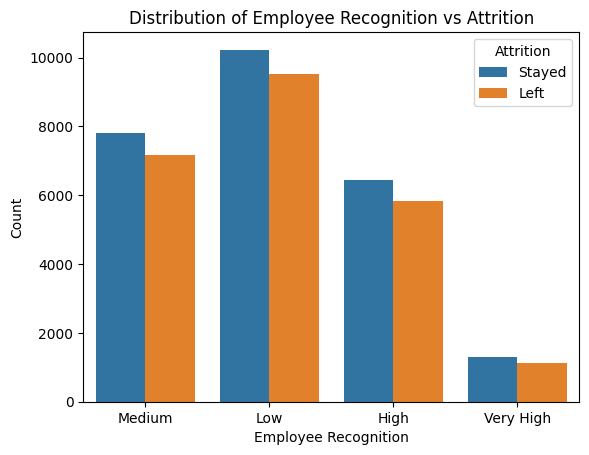

In [24]:
# Plot distribution for each categorical column with target variable
for col in X_train.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=X_train[col], hue=y_train)
    plt.title(f"Distribution of {col} vs Attrition")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Attrition",loc='upper right')
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [25]:
# Select numerical columns
X_validation_numeric = X_validation.select_dtypes(include=np.number)
X_validation_numeric.columns


Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents'],
      dtype='object')

5.1.2 Plot distribution of numerical columns

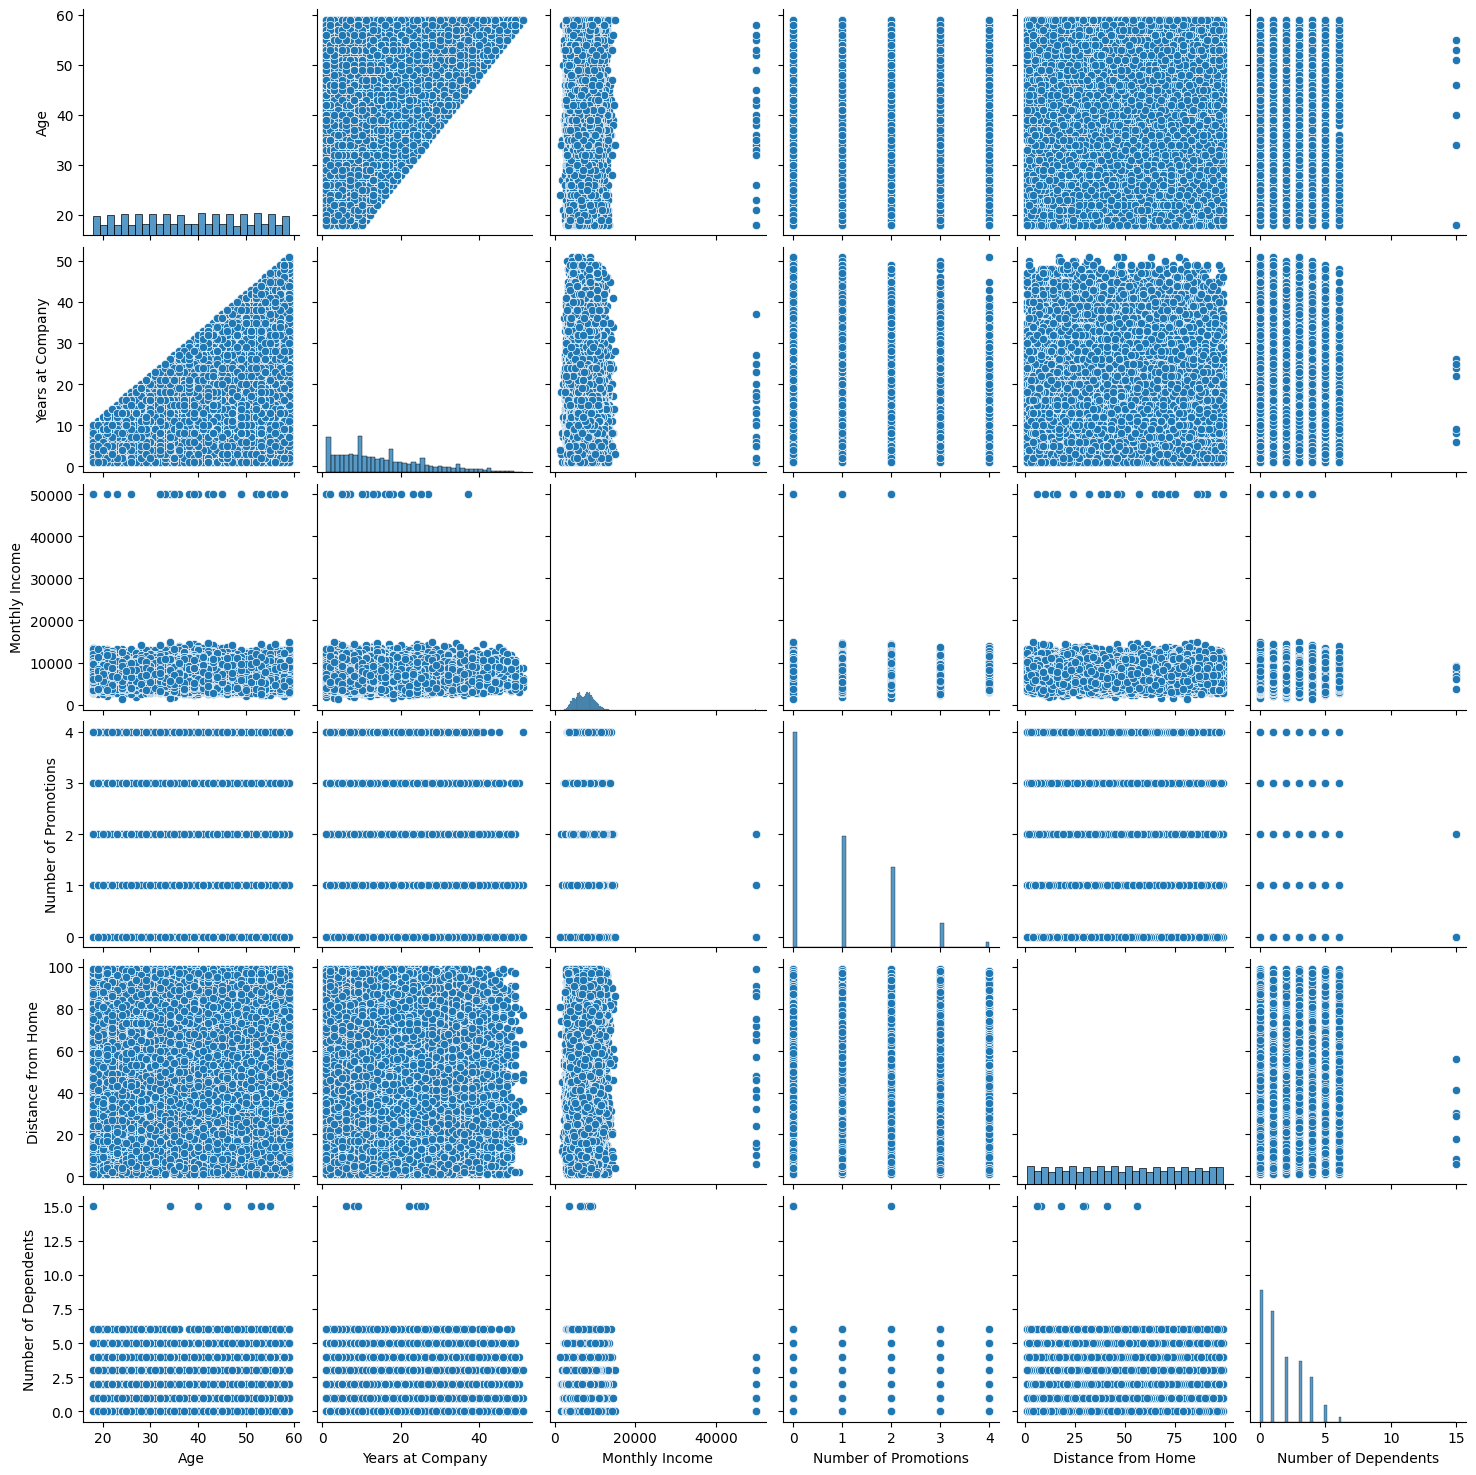

In [26]:
# Plot all the numerical columns to understand their distribution
sns.pairplot(X_validation)
plt.show()


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

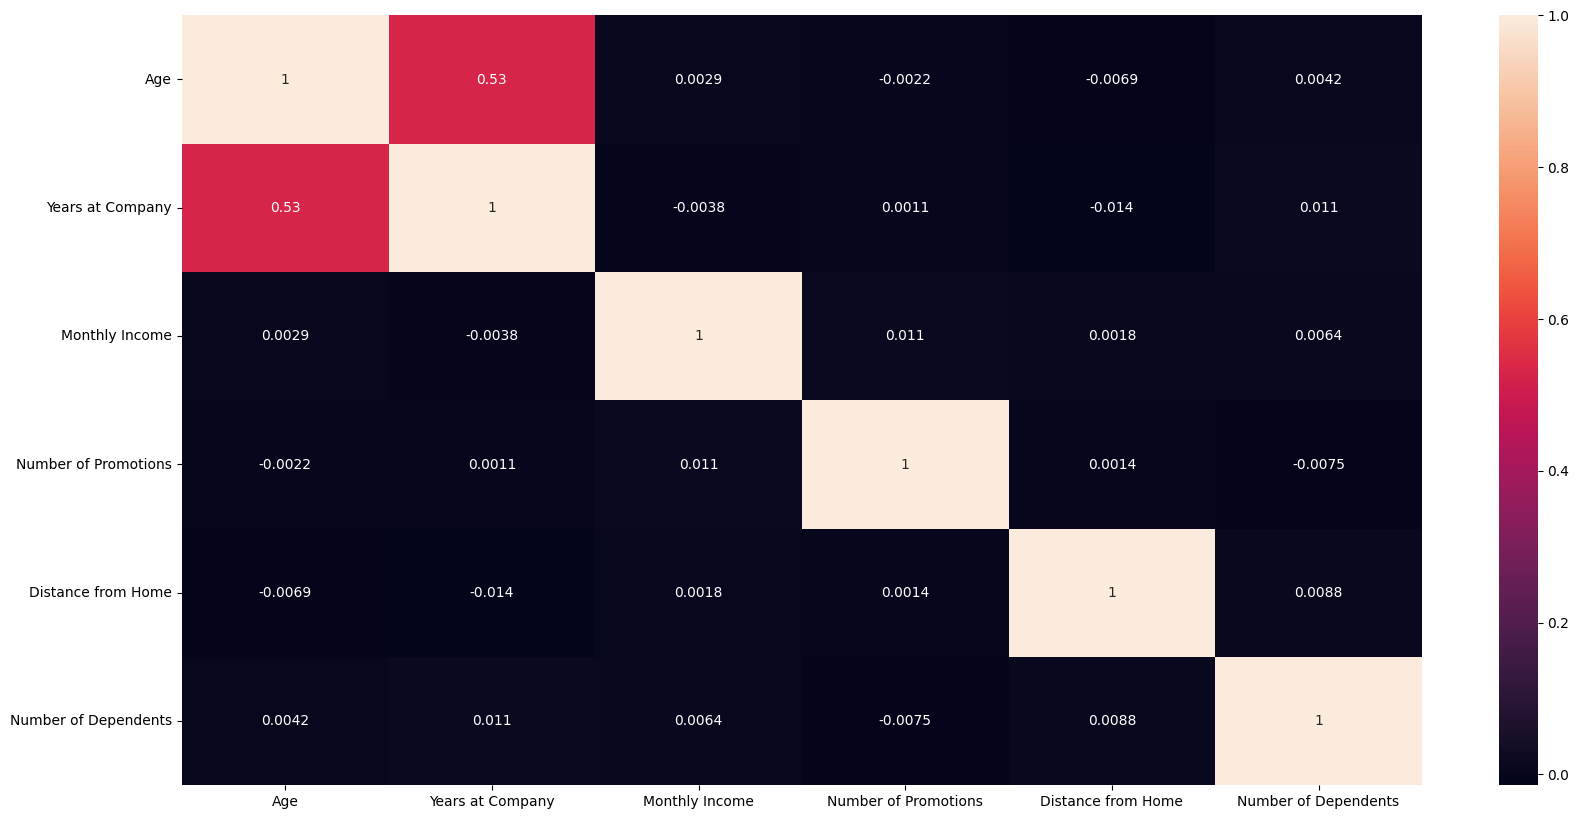

In [27]:
# Create correlation matrix for numerical columns
corr_matrix = X_validation_numeric.corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix,annot = True)
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

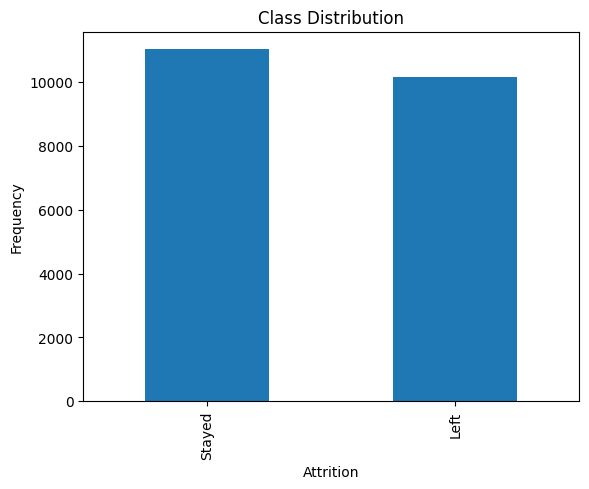

In [28]:
# Plot a bar chart to check class balance
y_validation.value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.ylabel('Frequency')
plt.show()


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

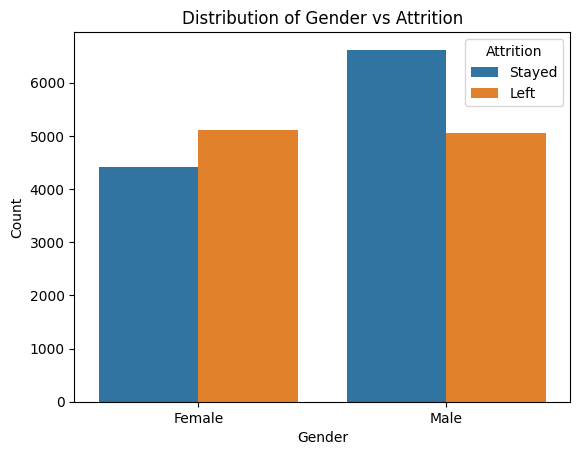

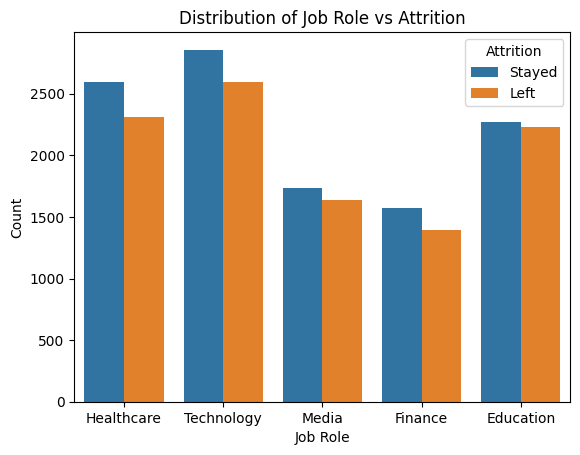

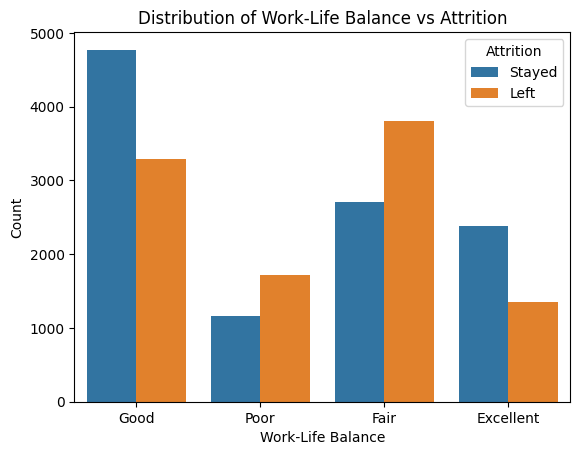

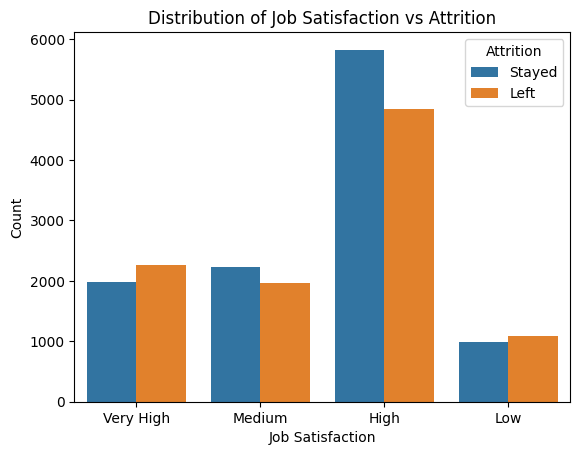

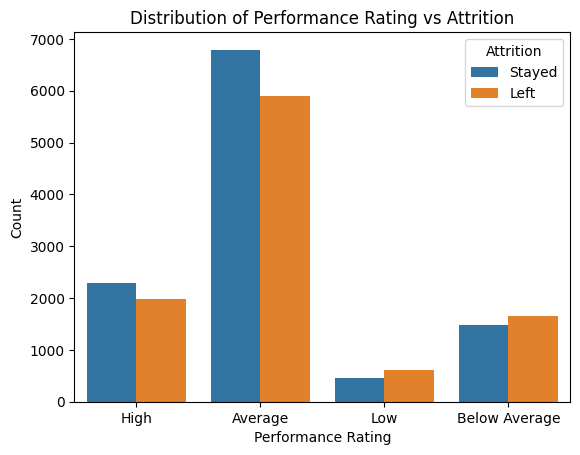

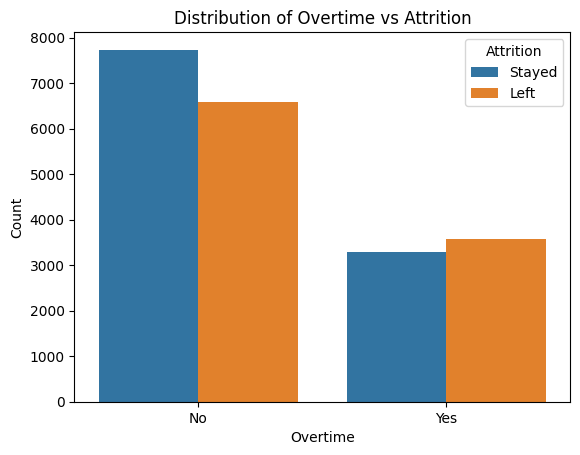

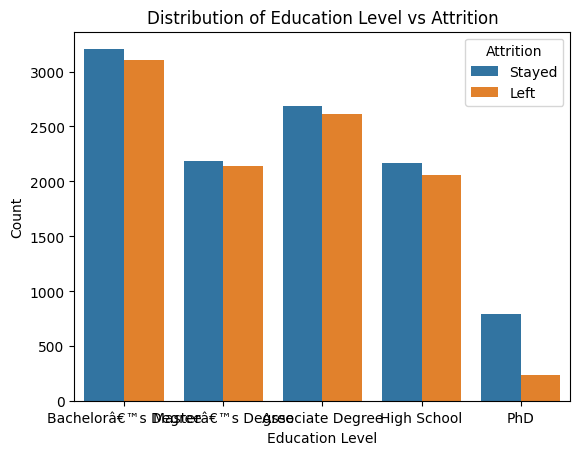

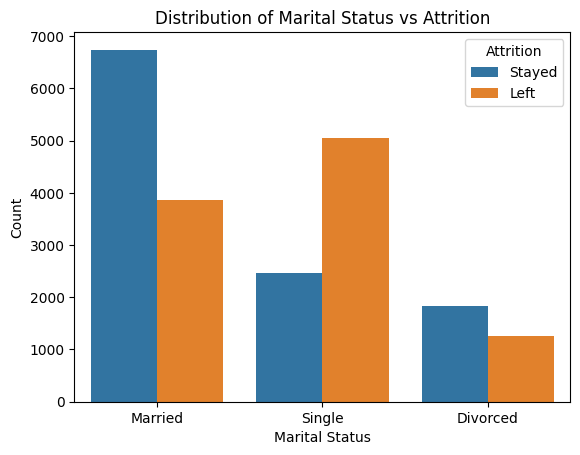

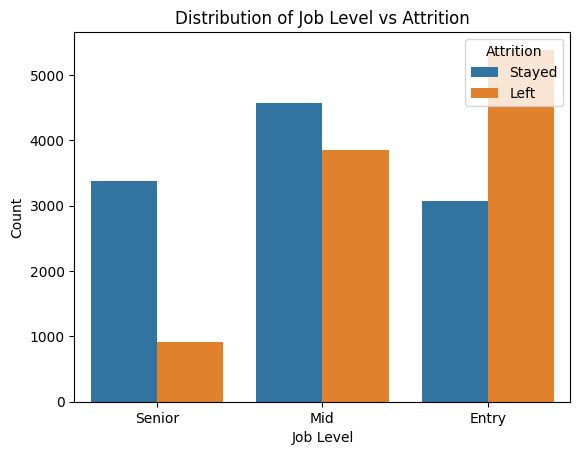

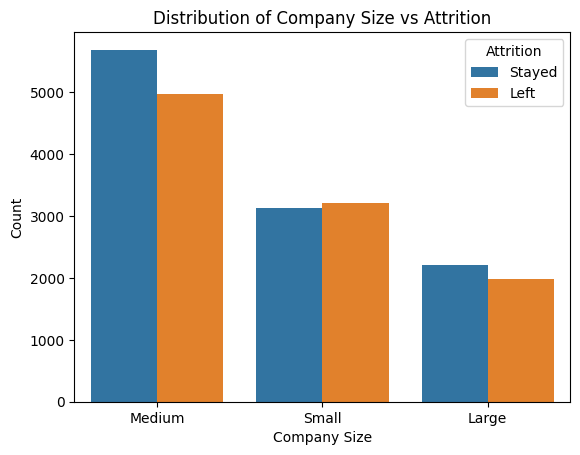

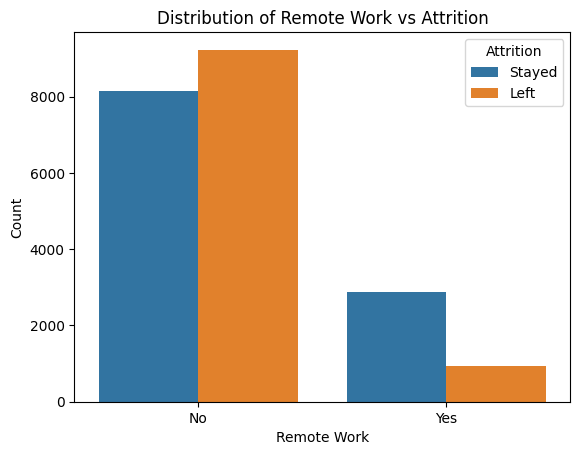

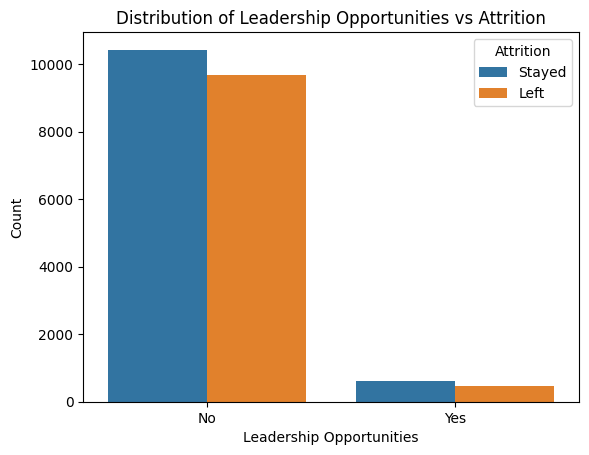

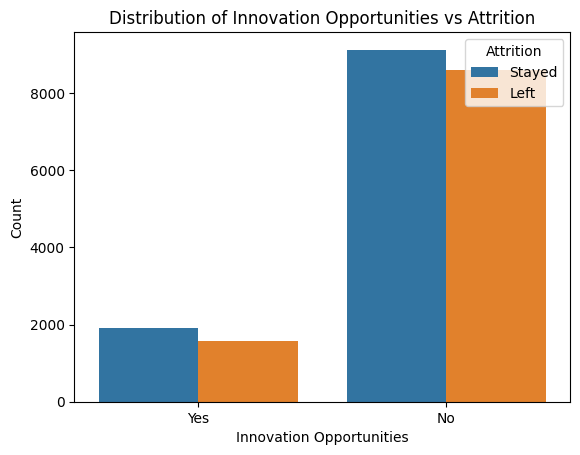

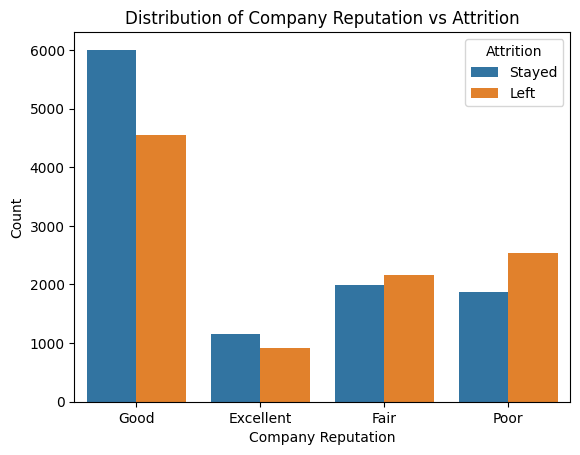

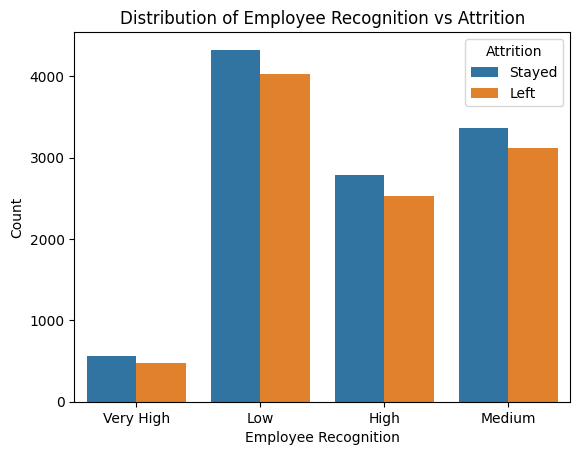

In [29]:
# Plot distribution for each categorical column with target variable
for col in X_validation.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=X_validation[col], hue=y_validation)
    plt.title(f"Distribution of {col} vs Attrition")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Attrition",loc='upper right')
    plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [30]:
# Check the categorical columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [31]:
# Create dummy variables using the 'get_dummies' for independent columns
dummy1 = pd.get_dummies(X_train[['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition']], drop_first=True)

# Add the results to the master DataFrame
X_train = pd.concat([X_train, dummy1], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [32]:
# Drop the original categorical columns and check the DataFrame
X_train = X_train.drop(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'], axis=1)

# Convert bool columns to numeric
bool_cols = X_train.select_dtypes(include='bool').columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_train.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
1516,39,25,5980,1,31.0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3352,19,3,8663,2,58.0,4,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
59196,49,29,6195,0,66.0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
71453,30,9,5753,1,59.0,3,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
68890,26,15,5811,2,76.0,2,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [33]:
# Create dummy variables using the 'get_dummies' for independent columns
dummy1 = pd.get_dummies(X_validation[['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition']], drop_first=True)

# Add the results to the master DataFrame
X_validation = pd.concat([X_validation, dummy1], axis=1)


Now, drop the original categorical columns and check the DataFrame

In [34]:
# Drop categorical columns and check the DataFrame
X_validation = X_validation.drop(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'], axis=1)

# Convert bool columns to numeric
bool_cols = X_validation.select_dtypes(include='bool').columns
X_validation[bool_cols] = X_validation[bool_cols].astype(int)
X_validation.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
38726,22,5,8751,2,32.0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
24574,43,19,8585,2,38.0,4,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
21775,39,2,5462,1,40.0,1,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
42700,30,11,7936,2,21.0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
60433,49,37,5413,1,13.0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0


6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [35]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train = y_train.to_frame()
y_validation = y_validation.to_frame()

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [36]:
# Create dummy variables using the 'get_dummies' for dependent column
dummy1 = pd.get_dummies(y_train[['Attrition']], drop_first=True)

y_train = pd.concat([y_train, dummy1], axis=1)

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [37]:
# Create dummy variables using the 'get_dummies' for dependent column
dummy1 = pd.get_dummies(y_validation[['Attrition']], drop_first=True)

y_validation = pd.concat([y_validation, dummy1], axis=1)

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [38]:
# Drop redundant columns from both train and validation
y_train = y_train.drop(['Attrition'], axis=1)
y_validation = y_validation.drop(['Attrition'], axis=1)

# Convert bool columns to numeric
bool_cols = y_train.select_dtypes(include='bool').columns
y_train[bool_cols] = y_train[bool_cols].astype(int)

bool_cols = y_validation.select_dtypes(include='bool').columns
y_validation[bool_cols] = y_validation[bool_cols].astype(int)

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [39]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [40]:
# Scale the numeric features present in the training set
scaler = StandardScaler()

X_train[['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions','Distance from Home', 'Number of Dependents']] = scaler.fit_transform(X_train[['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions','Distance from Home', 'Number of Dependents']])

# Scale the numerical features present in the validation set
X_validation[['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions','Distance from Home', 'Number of Dependents']] = scaler.fit_transform(X_validation[['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions','Distance from Home', 'Number of Dependents']])


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [41]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [42]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [43]:
# Display the features selected by RFE
X_train.columns[rfe.support_]

Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single',
       'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes',
       'Company Reputation_Fair', 'Company Reputation_Poor'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [44]:
# Put columns selected by RFE into variable 'col'
col = X_train.columns[rfe.support_]

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [45]:
# Select only the columns selected by RFE
X_train[col].columns

Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single',
       'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes',
       'Company Reputation_Fair', 'Company Reputation_Poor'],
      dtype='object')

In [46]:
# View the training data
X_train[col]

,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
1516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3352,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
59196,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
71453,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
68890,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15937,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
66958,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69203,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
59485,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [47]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])


7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [48]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       Attrition_Stayed   No. Observations:                49444
Model:                            GLM   Df Residuals:                    49428
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25072.
Date:                Sun, 25 May 2025   Deviance:                       50143.
Time:                        21:35:36   Pearson chi2:                 4.64e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3095
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2356      0.028      8.336      0.000       0.180       0.291
Gender_Male                          0.5738      0.022     25.875      0.000       0.530       0.617
Work-Life Balance_Fair              -1.0572      0.025    -41.957      0.000      -1.107      -1.008
Work-Life Balance_Poor              -1.2489      0.034    -37.262      0.000      -1.315      -1.183
Job Satisfaction_Low                -0.4914      0.037    -13.282      0.000      -0.564      -0.419
Job Satisfaction_Very High          -0.4829      0.028    -17.462      0.000      -0.537      -0.429
Performance Rating_Below Average    -0.3079      0.031    -10.012      0.000      -0.368      -0.248
Performance Rating_Low              -0.5673      0.051    -11.058      0.000      -0.668      -0.467
Overtime_Yes                        -0.3286      0.023    -14.053      0.000      -0.374      -0.283
Education Level_PhD                  1.4826      0.055     27.084      0.000       1.375       1.590
Marital Status_Single               -1.6887      0.025    -68.644      0.000      -1.737      -1.640
Job Level_Mid                        0.9611      0.024     39.780      0.000       0.914       1.008
Job Level_Senior                     2.5326      0.035     73.125      0.000       2.465       2.600
Remote Work_Yes                      1.7154      0.032     53.379      0.000       1.652       1.778
Company Reputation_Fair             -0.5296      0.028    -18.633      0.000      -0.585      -0.474
Company Reputation_Poor             -0.7359      0.029    -25.758      0.000      -0.792      -0.680
====================================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [49]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Make a VIF DataFrame for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Gender_Male,1.83
10,Job Level_Mid,1.65
9,Marital Status_Single,1.42
1,Work-Life Balance_Fair,1.41
7,Overtime_Yes,1.39
11,Job Level_Senior,1.33
14,Company Reputation_Poor,1.26
13,Company Reputation_Fair,1.26
4,Job Satisfaction_Very High,1.23
12,Remote Work_Yes,1.18


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [51]:
# Predict the probabilities on the training set
y_train_pred = res.predict(X_train_sm)

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [52]:
# Reshape it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.37746979, 0.94334509, 0.76793652, 0.4365627 , 0.80267965,
       0.02054991, 0.58090374, 0.80556731, 0.48127939, 0.58090374])

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [53]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Stayed':y_train.iloc[:, 0].values, 'Stayed_Prob':y_train_pred})
#y_train_pred_final['EmpID'] = y_train.index
y_train_pred_final.head()

,Stayed,Stayed_Prob
0,1,0.377470
1,1,0.943345
2,0,0.767937
3,0,0.436563
4,0,0.802680


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [54]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Stayed_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Stayed,Stayed_Prob,Predicted
0,1,0.377470,0
1,1,0.943345,1
2,0,0.767937,1
3,0,0.436563,0
4,0,0.802680,1


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [55]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Stayed, y_train_pred_final.Predicted))

0.738734730199822


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [56]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Stayed, y_train_pred_final.Predicted )
print(confusion)

[[17104  6559]
 [ 6359 19422]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [57]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [58]:
# Calculate sensitivity
sensitivity = TP / float(TP+FN)
print(sensitivity)

0.7533454869865405


In [59]:
# Calculate specificity
specifity = TN / float(TN+FP)
print(specifity)

0.7228162109622618


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [60]:
# Calculate precision
precision = TP / float(TP+FP)
print(precision)

0.7475462838227935


In [61]:
# Calculate recall
recall = TP / float(TP+FN)
print(recall)

0.7533454869865405


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [62]:
# Define ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

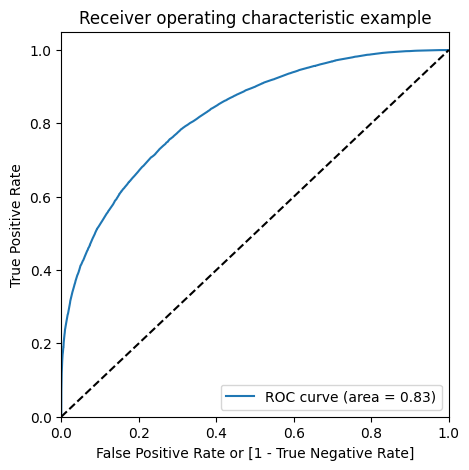

In [63]:
# Call the ROC function
draw_roc(y_train_pred_final.Stayed, y_train_pred_final.Stayed_Prob)

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [64]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Stayed_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Stayed,Stayed_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.377470,0,1,1,1,1,0,0,0,0,0,0
1,1,0.943345,1,1,1,1,1,1,1,1,1,1,1
2,0,0.767937,1,1,1,1,1,1,1,1,1,0,0
3,0,0.436563,0,1,1,1,1,1,0,0,0,0,0
4,0,0.802680,1,1,1,1,1,1,1,1,1,1,0


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [65]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Stayed, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.521418  1.000000  0.000000
0.1   0.1  0.587392  0.994686  0.143642
0.2   0.2  0.659352  0.961289  0.330389
0.3   0.3  0.703968  0.909623  0.479905
0.4   0.4  0.731312  0.839455  0.613489
0.5   0.5  0.738735  0.753345  0.722816
0.6   0.6  0.729209  0.644467  0.821536
0.7   0.7  0.704939  0.527714  0.898026
0.8   0.8  0.660464  0.387689  0.957655
0.9   0.9  0.587614  0.215973  0.992520


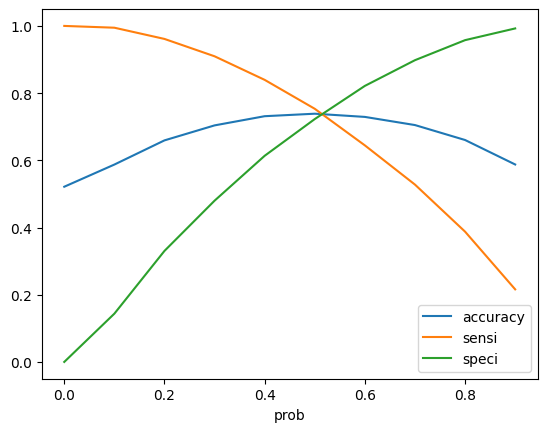

In [66]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [67]:
# Create a column for final prediction based on the optimal cutoff

# From the curve above, 0.5 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Stayed_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Stayed,Stayed_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.377470,0,1,1,1,1,0,0,0,0,0,0,0
1,1,0.943345,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.767937,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.436563,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.802680,1,1,1,1,1,1,1,1,1,1,0,1


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [68]:
# Calculate the accuracy
metrics.accuracy_score(y_train_pred_final.Stayed, y_train_pred_final.final_predicted)

0.738734730199822

7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [69]:
# Create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Stayed, y_train_pred_final.final_predicted )
confusion2

array([[17104,  6559],
       [ 6359, 19422]])

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [70]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [71]:
# Calculate Sensitivity
sensitivity = TP / float(TP+FN)
print(sensitivity)

0.7533454869865405


In [72]:
# Calculate Specificity
specifity = TN / float(TN+FP)
print(specifity)

0.7228162109622618


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [73]:
# Calculate Precision
precision = TP / float(TP+FP)
print(precision)

0.7475462838227935


In [74]:
# Calculate Recall
recall = TP / float(TP+FN)
print(recall)

0.7533454869865405


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [75]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [76]:
# Check actual and predicted values from initial model
y_train_pred_final.Stayed, y_train_pred_final.Predicted

(0        1
 1        1
 2        0
 3        0
 4        0
         ..
 49439    0
 49440    1
 49441    1
 49442    1
 49443    1
 Name: Stayed, Length: 49444, dtype: int64,
 0        0
 1        1
 2        1
 3        0
 4        1
         ..
 49439    0
 49440    1
 49441    1
 49442    1
 49443    1
 Name: Predicted, Length: 49444, dtype: int64)

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

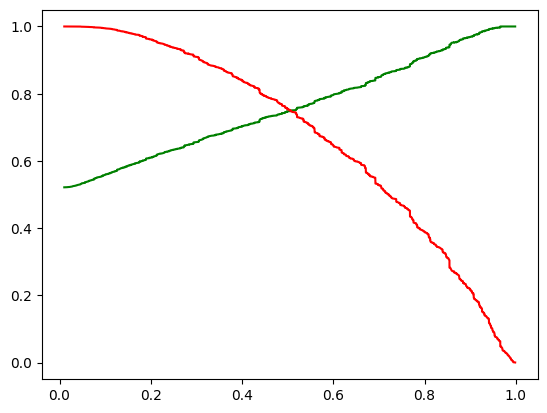

In [77]:
# Plot precision-recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Stayed, y_train_pred_final.Stayed_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [78]:
# Select the relevant features for validation set
X_validation = X_validation[col]
X_validation.head()

,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
38726,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
24574,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21775,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0
42700,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
60433,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [79]:
# Add constant to X_validation
X_validation_sm = sm.add_constant(X_validation)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [80]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = res.predict(X_validation_sm)

# View predictions
y_validation_pred[:10]

38726    0.907654
24574    0.940935
21775    0.237373
42700    0.569507
60433    0.126088
20041    0.555238
63567    0.782291
41761    0.355160
65927    0.772659
63897    0.534816
dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [81]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred)

# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_validation)

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
predicted_probability.reset_index(drop=True, inplace=True)
actual.reset_index(drop=True, inplace=True)

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [82]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
y_pred_final = pd.concat([actual, predicted_probability],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Stayed_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Attrition_Stayed' : 'Stayed'})
y_pred_final = y_pred_final.reindex(columns=['Stayed','Stayed_Prob'])
y_pred_final['final_predicted'] = y_pred_final.Stayed_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Check the DataFrame
y_pred_final.head()

,Stayed,Stayed_Prob,final_predicted
0,1,0.907654,1
1,1,0.940935,1
2,1,0.237373,0
3,1,0.569507,1
4,0,0.126088,0


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [83]:
# Calculate the overall accuracy
metrics.accuracy_score(y_pred_final.Stayed, y_pred_final.final_predicted)

0.7356896795809542

### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [84]:
# Create confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Stayed, y_pred_final.final_predicted )
confusion2

array([[7357, 2805],
       [2796, 8233]])

In [85]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [86]:
# Calculate sensitivity
sensitivity = TP / float(TP+FN)
print(sensitivity)

0.7464865354973252


In [87]:
# Calculate specificity
specifity = TN / float(TN+FP)
print(specifity)

0.7239716591222201


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [88]:
# Calculate precision
precision = TP / float(TP+FP)
print(precision)

0.745877876426889


In [89]:
# Calculate recall
recall = TP / float(TP+FN)
print(recall)

0.7464865354973252


## Conclusion



<b> I. Model Overview and Fit <b>

1.	Model Type: A Generalized Linear Model (GLM) with a Binomial family and Logit link function. This is essentially a Logistic Regression, which is appropriate for predicting a binary outcome (whether an employee stays or leaves).
2.	Sample Size: The model is built on a substantial dataset of 49,444 observations, providing a robust statistical basis for the findings.
3.	Model Fit (Pseudo R-squ. (CS)): The Cox & Snell Pseudo R-squared is 0.3095. This indicates that the model explains approximately 30.95% of the variability in employee retention compared to a model with no predictors. While pseudo R-squared values are generally lower than OLS R-squared, a value of 0.3095 suggests a decent fit, indicating that the chosen predictors have a meaningful impact on explaining employee retention.


<b> II. Feature Importance and Direction of Influence (Coefficients) <b>

All listed predictor variables are highly statistically significant (P>|z| = 0.000 for all), meaning their observed effects are very unlikely to be due to random chance.
Let's interpret the impact of key variables on the odds of an employee STAYING:

Factors that Increase the Odds of an Employee Staying:

Odds Ratio=e^coef

•	Gender_Male (coef: 0.5738, Odds Ratio ≈ 1.77): Male employees are significantly more likely to stay compared to females. The odds of staying are about 1.77 times higher for males.

•	Education Level_PhD (coef: 1.4826, Odds Ratio ≈ 4.40): Employees with a PhD education level are significantly more likely to stay. The odds of staying are substantially higher (about 4.4 times) for those with a PhD. This suggests a strong positive correlation between higher education (specifically PhD) and retention.

•	Job Level_Mid (coef: 0.9611, Odds Ratio ≈ 2.61): Employees in Mid-level jobs are significantly more likely to stay. The odds of staying are about 2.61 times higher for Mid-level employees.

•	Job Level_Senior (coef: 2.5326, Odds Ratio ≈ 12.59): Employees in Senior-level jobs are very significantly more likely to stay. The odds of staying are about 12.59 times higher for Senior-level employees.

•	Remote Work_Yes (coef: 1.7154, Odds Ratio ≈ 5.56): Employees who work remotely are significantly more likely to stay. The odds of staying are about 5.56 times higher for remote workers compared to non-remote workers.
Factors that Decrease the Odds of an Employee Staying (i.e., Increase the Odds of Attrition):

•	Work-Life Balance_Fair (coef: -1.0572, Odds Ratio ≈ 0.35): Employees with a "Fair" Work-Life Balance are significantly less likely to stay. The odds of staying are about 0.35 times (or 65% lower) for those with 'Fair' balance.

•	Work-Life Balance_Poor (coef: -1.2489, Odds Ratio ≈ 0.29): Employees with a "Poor" Work-Life Balance are even more significantly less likely to stay. The odds of staying are about 0.29 times (or 71% lower) for those with 'Poor' balance.

•	Job Satisfaction_Low (coef: -0.4914, Odds Ratio ≈ 0.61): Employees with "Low" Job Satisfaction are significantly less likely to stay. The odds of staying are about 0.61 times (or 39% lower).

•	Job Satisfaction_Very High (coef: -0.4829, Odds Ratio ≈ 0.62): Employees with "Very High" Job Satisfaction are also significantly less likely to stay. The odds of staying are about 0.62 times (or 38% lower). This counter-intuitive result warrants further investigation. It could indicate issues like: 

    o	People with "Very High" satisfaction might be more marketable and thus approached by competitors.

    o	A ceiling effect where "High" is optimal, and "Very High" might correlate with other unmeasured factors (e.g., being overworked, or the survey question doesn't fully capture reality).

    o	Potential data issue or a complex non-linear relationship not fully captured by linear log-odds.

•	Performance Rating_Below Average (coef: -0.3079, Odds Ratio ≈ 0.73): Employees with "Below Average" Performance Ratings are significantly less likely to stay.

•	Performance Rating_Low (coef: -0.5673, Odds Ratio ≈ 0.57): Employees with "Low" Performance Ratings are even more significantly less likely to stay.

•	Overtime_Yes (coef: -0.3286, Odds Ratio ≈ 0.72): Employees who work overtime are significantly less likely to stay compared to those who don't.

•	Marital Status_Single (coef: -1.6887, Odds Ratio ≈ 0.18): Single employees are very significantly less likely to stay. The odds of staying are only about 0.18 times (or 82% lower) for single individuals.

•	Company Reputation_Fair (coef: -0.5296, Odds Ratio ≈ 0.59): A "Fair" company reputation significantly decreases the odds of staying.

•	Company Reputation_Poor (coef: -0.7359, Odds Ratio ≈ 0.48): A "Poor" company reputation even more significantly decreases the odds of staying.


<b> III. Multicollinearity Check (VIF) <b>

The VIF (Variance Inflation Factor) values are all very low (all below 2.0).

•	Conclusion: This indicates that multicollinearity is not a significant problem in the model. There's no strong linear dependence among predictor variables, which is good for the stability and interpretability of coefficients. Each predictor is bringing unique linear information to the model.


<b> IV. Model Performance (Accuracy, Sensitivity, Specificity, Precision, Recall) <b>

Training Data Performance:

•	Accuracy: 0.7387

•	Sensitivity (Recall): 0.7533

•	Specificity: 0.7228

•	Precision: 0.7475

Test Data Performance:

•	Accuracy: 0.7357

•	Sensitivity (Recall): 0.7465

•	Specificity: 0.7240

•	Precision: 0.7459

<b> Conclusions on Performance: <b>

1.	Consistency (Generalization): The performance metrics on the test data are very close to those on the training data. This indicates that the model is not overfitting to the training data and generalizes well to unseen data. This is a very positive sign for the model's reliability in a real-world scenario.

2.	Overall Accuracy: With an accuracy of around 73.5-73.9%, the model correctly classifies about three-quarters of employees as either staying or leaving.

3.	Balance of Errors (Sensitivity vs. Specificity):

    o	Sensitivity/Recall (True Positive Rate): Around 74.6-75.3%. This means the model correctly identifies about 75% of the employees who actually belong to the positive class (Attrition_Stayed=1, meaning stayed).

  
    o	Specificity (True Negative Rate): Around 72.3-72.4%. This means the model correctly identifies about 72% of the employees who actually belong to the negative class (Attrition_Stayed=0, meaning left).

  
    o	The model has a fairly balanced ability to detect both positive and negative cases. There isn't a strong bias towards one type of error.

5.	Precision: Around 74.6-74.7%. This means that when the model predicts an employee will belong to the positive class (Attrition_Stayed=1), it is correct about 74.7% of the time.


<b> Overall Strategic Conclusions for Employee Retention:<b>

1.	Significant Drivers Identified: The model clearly identifies several highly statistically significant factors influencing employee retention:

    o	Positive Influences: Being male, having a PhD, being in Mid or Senior Job Levels, and working remotely strongly increase the odds of an employee staying.

  
    o	Negative Influences: Poor/Fair Work-Life Balance, Low/Very High Job Satisfaction (the "Very High" needs careful follow-up), Below Average/Low Performance Rating, working Overtime, being Single, and having a Fair/Poor Company Reputation all strongly decrease the odds of an employee staying (i.e., increase attrition risk).

3.	Actionable Insights:

    o	Work-Life Balance, Overtime, and Company Reputation: Improving work-life balance, reducing excessive overtime, and enhancing company reputation could directly impact retention.

  
    o	Job Satisfaction: While 'Low' satisfaction intuitively leads to attrition, the 'Very High' result for job satisfaction needs further investigation to understand its nuance. It might imply burnout or being highly sought after, requiring different retention strategies.

  
    o	Marital Status: Being single is a very strong predictor of attrition risk. This could suggest different life stage needs or support systems that the company might consider for single employees.

  
    o	Job Level and Education: Employees at higher job levels and with higher education (PhD) tend to stay more. This might suggest a need to focus retention efforts on entry-level employees or those with lower education, or it simply reflects typical career trajectories.

  
    o	Remote Work: The strong positive impact of remote work suggests it's a valuable retention tool.

4.	Model Reliability: The consistent performance between training and test sets indicates the model is robust and its findings can be trusted for practical application.

5.	Further Steps: 


    o	"Very High" Job Satisfaction: Conduct qualitative research or deeper analysis into why "Very High" job satisfaction also correlates with attrition risk.
    
    o	Intervention Strategy: Use these insights to develop targeted retention programs. For example, employees who are single, working overtime, and have a poor work-life balance might be high-priority candidates for intervention.

  
    o	Threshold Tuning: Depending on the business objective (e.g., minimizing false positives for expensive interventions vs. maximizing detection of all at-risk employees), the classification threshold can be adjusted.


    o	Feature Engineering: Explore if combining or transforming existing features could yield even stronger predictive power.
